What if your data is actually more complex than a simple straight line?Surprisingly you can actually use a linear model to fit non-linear data.A simple way to do this is to aadd powers of each feature as new features,then train a linear model on this extended  set of features.This technique is called "Polynomial Regression"

In [2]:
#Let's look at the following example
import numpy as np
m = 100
X= 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [3]:
import matplotlib.pyplot as plt
plt.plot(X,y,'.')

Clearly,a st.line will never fit this data properly,so let's use Scikit-learn's PolynomialFeatures class to transform our training data by adding the square(2nd-degree polynomial) of each feature in the training set as new feature

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2,include_bias = False)

In [5]:
X_poly = poly_features.fit_transform(X)

In [6]:
X[0]

array([1.42577812])

In [7]:
X_poly[0]

array([1.42577812, 2.03284324])

X_poly contains the original feature of X plus the square of this feature,now we can fit a LinearRegression model to this extended training data

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [9]:
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([2.15346304]), array([[1.01671689, 0.44715948]]))

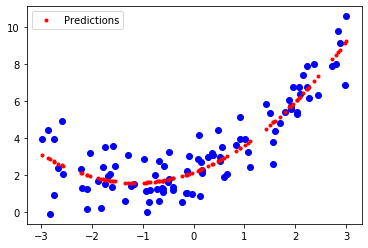

In [10]:
plt.scatter(X, y, color = 'blue') 
plt.plot(X, lin_reg.predict(poly_features.fit_transform(X)),'.',color = 'r',label = 'Predictions')
plt.legend()

In [34]:
#Now lets check for the following dataset
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
# Importing the dataset 
datas = pd.read_csv("data.csv") 
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


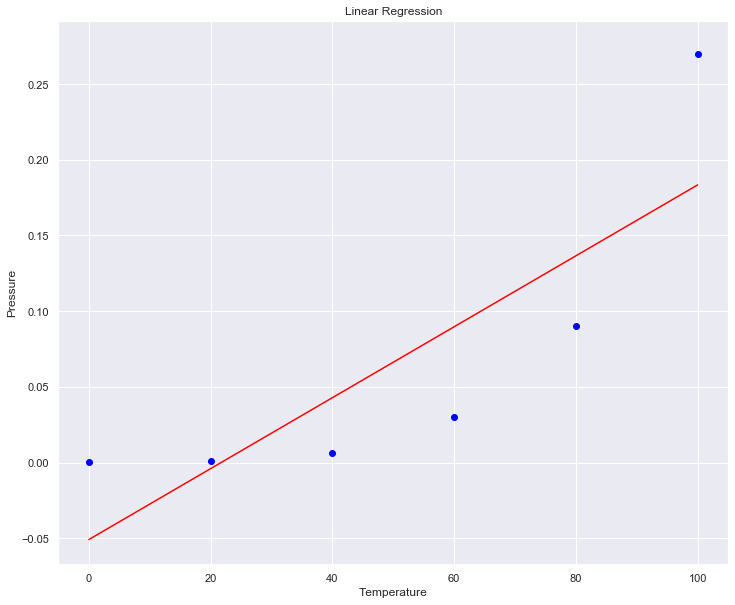

In [40]:
#Divide dataset into two components that is X and y.X will contain the Column between 1 and 2. y will contain the 2 column
X = datas.iloc[:, 1:2].values 
y = datas.iloc[:, 2].values
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
lin.fit(X, y)
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree = 6) 
X_poly = poly.fit_transform(X)  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
plt.show() 

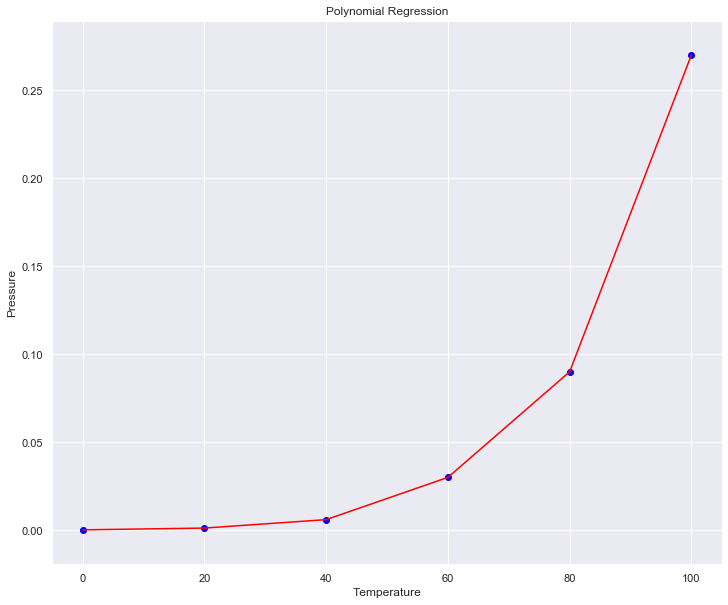

In [41]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show()

In [37]:
# Predicting a new result with Linear Regression 
lin.predict([[110.0]])

array([0.20675333])

In [38]:
# Predicting a new result with Polynomial Regression 
lin2.predict(poly.fit_transform([[110.0]]))

array([0.43295877])

Polynomial basically fits wide range of curvature.
Polynomial provides the best approximation of the relationship between dependent and independent variable.

In [13]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

B: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [14]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The target values is missing from the data. Create a new column of target values and add it to dataframe

In [16]:
boston['MEDV'] = boston_dataset.target
boston['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [17]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

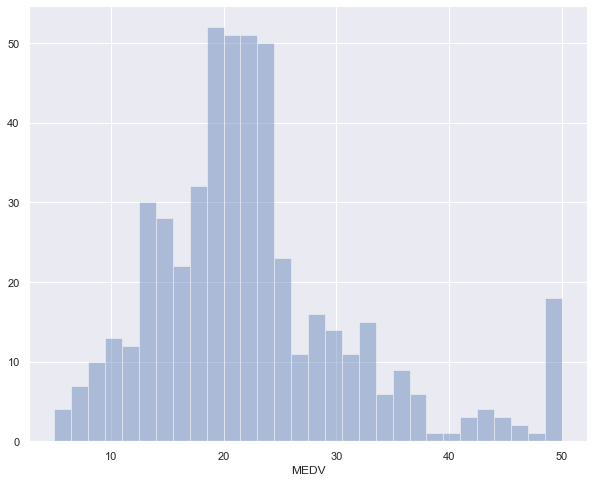

In [18]:
# set the size of the figure  #as we can check from sns.axes_style() 
sns.set(rc={'figure.figsize':(10,8)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=30,kde=False)
plt.show()

In [19]:
#Correlation Matrix
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)

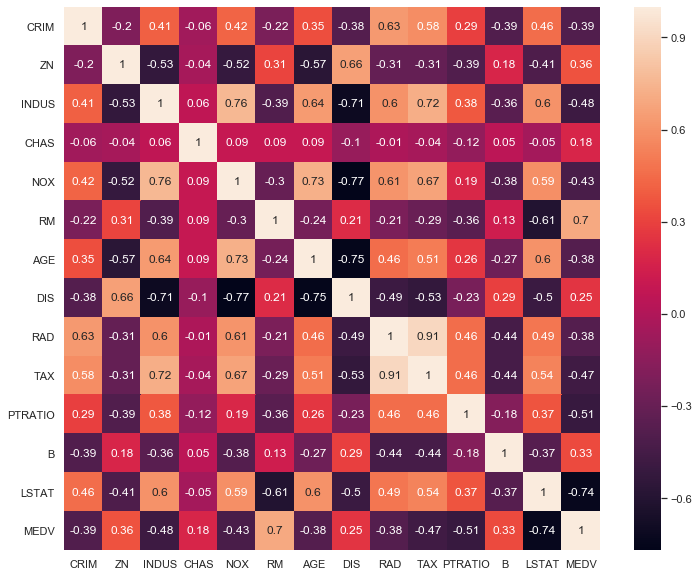

In [20]:
# use the heatmap function from seaborn to plot the correlation matrix
#Plot rectangular data as a color-encoded matrix.
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(data=correlation_matrix, annot=True)

Observations

From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT, RM

RAD and TAX are stronly correlated, so we don't include this in our features together to avoid multi-colinearity

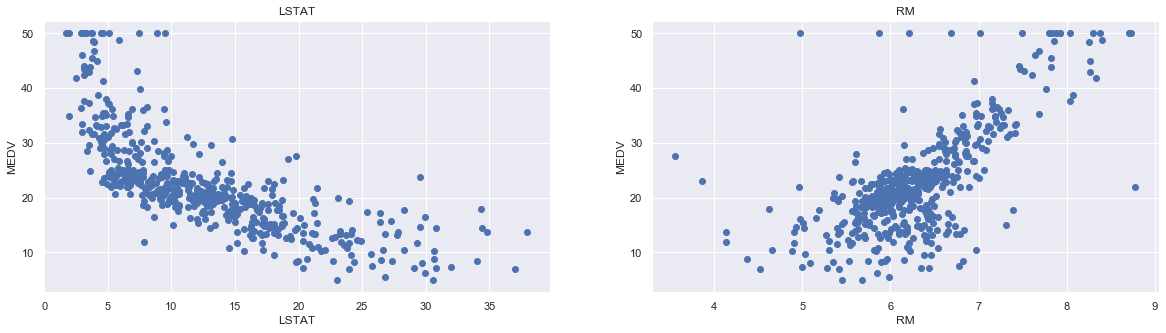

In [21]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

#Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [22]:
#Prepare the data for training
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
print(X)
Y = boston['MEDV']
print(Y)

     LSTAT     RM
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
4     5.33  7.147
5     5.21  6.430
6    12.43  6.012
7    19.15  6.172
8    29.93  5.631
9    17.10  6.004
10   20.45  6.377
11   13.27  6.009
12   15.71  5.889
13    8.26  5.949
14   10.26  6.096
15    8.47  5.834
16    6.58  5.935
17   14.67  5.990
18   11.69  5.456
19   11.28  5.727
20   21.02  5.570
21   13.83  5.965
22   18.72  6.142
23   19.88  5.813
24   16.30  5.924
25   16.51  5.599
26   14.81  5.813
27   17.28  6.047
28   12.80  6.495
29   11.98  6.674
..     ...    ...
476  18.68  6.484
477  24.91  5.304
478  18.03  6.185
479  13.11  6.229
480  10.74  6.242
481   7.74  6.750
482   7.01  7.061
483  10.42  5.762
484  13.34  5.871
485  10.58  6.312
486  14.98  6.114
487  11.45  5.905
488  18.06  5.454
489  23.97  5.414
490  29.68  5.093
491  18.07  5.983
492  13.35  5.983
493  12.01  5.707
494  13.59  5.926
495  17.60  5.670
496  21.14  5.390
497  14.10  5.794
498  12.92  6.019
499  15.10

In [23]:
#randomstate is basically used for reproducing your problem the same every time it is run. 
#If you do not use a randomstate in traintestsplit, every time you make the split you might get a 
#different set of train and test data points
#To understand random_state let us take this small example
from sklearn.model_selection import train_test_split
a, b = np.arange(10).reshape((5, 2)), range(5)
train_test_split(a,b)

[array([[8, 9],
        [6, 7],
        [0, 1]]), array([[2, 3],
        [4, 5]]), [4, 3, 0], [1, 2]]

In [24]:
train_test_split(a,b)

[array([[4, 5],
        [8, 9],
        [0, 1]]), array([[2, 3],
        [6, 7]]), [2, 4, 0], [1, 3]]

In [25]:
train_test_split(a,b,random_state=1)

[array([[8, 9],
        [0, 1],
        [6, 7]]), array([[4, 5],
        [2, 3]]), [4, 0, 3], [2, 1]]

In [26]:
train_test_split(a,b,random_state=1)

[array([[8, 9],
        [0, 1],
        [6, 7]]), array([[4, 5],
        [2, 3]]), [4, 0, 3], [2, 1]]

In [27]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(X_test)
print(Y_train.shape)
print(Y_test.shape)
print(Y_test)

(404, 2)
(102, 2)
     LSTAT     RM
226   3.13  8.040
292   4.70  6.630
90    8.81  6.417
373  34.77  4.906
273   6.58  7.691
417  26.64  5.304
503   5.64  6.976
234   8.05  6.726
111  10.16  6.715
472  14.36  6.437
99    6.19  7.416
339   9.74  5.985
309   9.97  5.972
304   6.93  7.236
272   7.73  6.538
346  12.67  5.898
412  34.37  4.628
151  13.28  5.404
496  21.14  5.390
410  10.11  5.757
490  29.68  5.093
132  11.12  6.372
224   4.14  8.266
318  10.36  6.382
284   7.85  7.088
444  23.79  5.854
321   6.87  6.376
116  12.04  6.176
333   5.68  6.316
351   5.49  6.579
..     ...    ...
49   16.20  5.602
409  19.78  6.852
407  12.13  5.608
353   4.50  6.728
170  14.43  5.875
149  21.45  5.597
263  11.25  7.327
421  15.70  6.006
471  12.87  6.229
163   3.32  8.375
221  21.46  6.164
434  15.17  6.208
66   10.24  5.787
449  19.31  6.417
499  15.10  5.569
392  25.68  5.036
297  15.84  5.790
352   7.79  5.884
186   4.45  7.831
21   13.83  5.965
479  13.11  6.229
442  16.59  6.219
329   7.34

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
R2 score is 0.6628996975186954


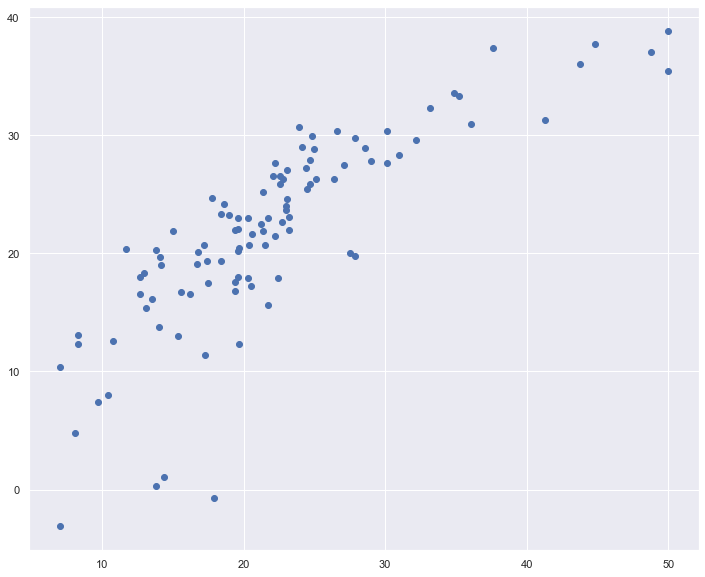

In [30]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

Polynomial Regression
We can see that LSTAT doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with degree 2 and test.

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library.

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
# predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(Y_train, y_train_predicted))
r2_train = r2_score(Y_train, y_train_predicted)
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
r2_test = r2_score(Y_test, y_test_predict)
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
print("\n")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 4.703071027847755
R2 score of training set is 0.7425094297364766


The model performance for the test set
-------------------------------------------
RMSE of test set is 3.7848198845450263
R2 score of test set is 0.8170372495892192


We can observe that the error has reduced after using polynomial regression as compared to linear regression

In [32]:
a = poly_model.predict(poly_features.fit_transform([[3.13,8.23]]))
a

array([46.64399291])